In [1]:
#Structure:
#Import librairies
#Import table/data
    #challenge: #file had metadata/explanations in the first 5 rows, which made the file irregular and caused an error (An error occurred: Error tokenizing data. C error: Expected 3 fields in line 5, saw 69) during the import
#quick cleaning of column names
#removing unwanted columns: because there are many, creation of a list to gather all the ones we need removed
#adding average column
#removing columns used for the calculation of average column and not needed anymore
#importing second dataset to add countries income group (high vs. low income)
#selecting only countries we want to analyze



import pandas as pd
import numpy as np


unpaid_dom_work_URL = '../data/raw/API_SG.TIM.UWRK.FE_DS2_en_csv_v2_3435778.csv'

try:
    unpaid_dom_work_df = pd.read_csv(unpaid_dom_work_URL)
    print("File loaded successfully!")
    print(unpaid_dom_work_df.head())  # Display the first few rows
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

#file had metadata/explanations in the first 5 rows, which made the file irregular and caused an error (An error occurred: Error tokenizing data. C error: Expected 3 fields in line 5, saw 69) during the import



File loaded successfully!
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name  Indicator Code  1960  \
0  Proportion of time spent on unpaid domestic an...  SG.TIM.UWRK.FE   NaN   
1  Proportion of time spent on unpaid domestic an...  SG.TIM.UWRK.FE   NaN   
2  Proportion of time spent on unpaid domestic an...  SG.TIM.UWRK.FE   NaN   
3  Proportion of time spent on unpaid domestic an...  SG.TIM.UWRK.FE   NaN   
4  Proportion of time spent on unpaid domestic an...  SG.TIM.UWRK.FE   NaN   

   1961  1962  1963  1964  1965  ...  2015  2016  2017  2018  2019  2020  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   N

In [2]:
unpaid_dom_work_df.shape

(266, 69)

In [3]:
#quick cleaning of column names
unpaid_dom_work_df.columns=[x.lower() for x in unpaid_dom_work_df.columns]
unpaid_dom_work_df.columns=[x.strip() for x in unpaid_dom_work_df.columns]
unpaid_dom_work_df.columns=map(lambda x:x.replace(" ","_"),unpaid_dom_work_df.columns)


#removing unwanted columns: because there are many, creation of a list to gather all the ones we need removed

list_years_to_remove=[1960]
year=1960
for i in range(39):
    year+=1
    list_years_to_remove.append(year)
print(list_years_to_remove)

for x in list_years_to_remove:
    unpaid_dom_work_df.drop(str(x), axis=1, inplace=True)

unpaid_dom_work_df.drop('unnamed:_68',axis=1,inplace=True)
unpaid_dom_work_df.drop('indicator_code',axis=1,inplace=True)


unpaid_dom_work_df.head()


[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]


,country_name,country_code,indicator_name,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Proportion of time spent on unpaid domestic an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Proportion of time spent on unpaid domestic an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Proportion of time spent on unpaid domestic an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Proportion of time spent on unpaid domestic an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Proportion of time spent on unpaid domestic an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#adding average column

list_years_for_average=[2000]
year_average=2000
for y in range(23):
    year_average+=1
    list_years_for_average.append(year_average)

list_years_for_average_str=[]
for z in list_years_for_average:
    z=str(z)
    list_years_for_average_str.append(z)


unpaid_dom_work_df['average_since_2000']=unpaid_dom_work_df[list_years_for_average_str].mean(axis=1)
unpaid_dom_work_df.head()

unpaid_dom_work_df['average_since_2000'].isna()
unpaid_dom_work_df['average_since_2000'].value_counts()

print(unpaid_dom_work_df.iloc[263])
unpaid_dom_work_df.head()

unpaid_dom_work_df['average_since_2000'].isna().sum() #We have 177 missing average out of 266 rows
unpaid_dom_work_df['average_since_2000'].isna().sum()/unpaid_dom_work_df.shape[0] # 67% missing values

unpaid_dom_work_df.head()

#removing columns used for the calculation of average column and not needed anymore
unpaid_dom_work_df.drop(columns=list_years_for_average_str,axis=1, inplace=True)


country_name                                               South Africa
country_code                                                        ZAF
indicator_name        Proportion of time spent on unpaid domestic an...
2000                                                           14.79167
2001                                                                NaN
2002                                                                NaN
2003                                                                NaN
2004                                                                NaN
2005                                                                NaN
2006                                                                NaN
2007                                                                NaN
2008                                                                NaN
2009                                                                NaN
2010                                                           1

In [5]:
#importing second dataset to add countries income group (high vs. low income)

unpaid_dom_work_URL_grouped_incometype = '../data/raw/Metadata_Country_API_SG.TIM.UWRK.FE_DS2_en_csv_v2_3435778.csv'

try:
    unpaid_dom_work_incometype_df = pd.read_csv(unpaid_dom_work_URL_grouped_incometype)
    print("File loaded successfully!")
    print(unpaid_dom_work_incometype_df.head())  # Display the first few rows
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

unpaid_dom_work_incometype_df.shape

File loaded successfully!
  Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFE                        NaN                  NaN   
2          AFG                 South Asia           Low income   
3          AFW                        NaN                  NaN   
4          AGO         Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                     TableName  Unnamed: 5  
0                        Aruba         NaN  
1  Africa Eastern and Southern         NaN  
2                  Afghanistan         NaN  
3   Africa Western and Central         NaN  
4              

(265, 6)

In [6]:
#keeping only columns we need

unpaid_dom_work_incometype_df=unpaid_dom_work_incometype_df[['Country Code','Region','IncomeGroup']]

#quick cleaning of column names
unpaid_dom_work_incometype_df.columns=[x.lower() for x in unpaid_dom_work_incometype_df.columns]
unpaid_dom_work_incometype_df.columns=[x.strip() for x in unpaid_dom_work_incometype_df.columns]
unpaid_dom_work_incometype_df.columns=map(lambda x:x.replace(" ","_"),unpaid_dom_work_incometype_df.columns)

unpaid_dom_work_incometype_df


,country_code,region,incomegroup
0,ABW,Latin America & Caribbean,High income
1,AFE,NaN,NaN
2,AFG,South Asia,Low income
3,AFW,NaN,NaN
4,AGO,Sub-Saharan Africa,Lower middle income
...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income
261,YEM,Middle East & North Africa,Low income
262,ZAF,Sub-Saharan Africa,Upper middle income
263,ZMB,Sub-Saharan Africa,Lower middle income


In [7]:
#merge of both data set on the country_code common column

unpaid_dom_work_merged_df=pd.merge(unpaid_dom_work_df, unpaid_dom_work_incometype_df, how='inner', on='country_code')
unpaid_dom_work_merged_df

,country_name,country_code,indicator_name,average_since_2000,region,incomegroup
0,Aruba,ABW,Proportion of time spent on unpaid domestic an...,NaN,Latin America & Caribbean,High income
1,Africa Eastern and Southern,AFE,Proportion of time spent on unpaid domestic an...,NaN,NaN,NaN
2,Afghanistan,AFG,Proportion of time spent on unpaid domestic an...,NaN,South Asia,Low income
3,Africa Western and Central,AFW,Proportion of time spent on unpaid domestic an...,NaN,NaN,NaN
4,Angola,AGO,Proportion of time spent on unpaid domestic an...,NaN,Sub-Saharan Africa,Lower middle income
...,...,...,...,...,...,...
260,Kosovo,XKX,Proportion of time spent on unpaid domestic an...,NaN,Europe & Central Asia,Upper middle income
261,"Yemen, Rep.",YEM,Proportion of time spent on unpaid domestic an...,NaN,Middle East & North Africa,Low income
262,South Africa,ZAF,Proportion of time spent on unpaid domestic an...,15.173615,Sub-Saharan Africa,Upper middle income
263,Zambia,ZMB,Proportion of time spent on unpaid domestic an...,NaN,Sub-Saharan Africa,Lower middle income


In [8]:
#selecting only countries we want to analyze

unpaid_dom_work_merged_df_test = unpaid_dom_work_merged_df[unpaid_dom_work_merged_df['country_name'].isin(['France', 'Germany','Norway','Greece','Brazil','United States','Colombia','Japan','New Zealand','Pakistan','Ghana','Cameroon'])]
unpaid_dom_work_merged_df_test= unpaid_dom_work_merged_df_test.reset_index()
unpaid_dom_work_merged_df_test

,index,country_name,country_code,indicator_name,average_since_2000,region,incomegroup
0,29,Brazil,BRA,Proportion of time spent on unpaid domestic an...,14.143553,Latin America & Caribbean,Upper middle income
1,42,Cameroon,CMR,Proportion of time spent on unpaid domestic an...,15.820860,Sub-Saharan Africa,Lower middle income
2,45,Colombia,COL,Proportion of time spent on unpaid domestic an...,17.256570,Latin America & Caribbean,Upper middle income
3,55,Germany,DEU,Proportion of time spent on unpaid domestic an...,17.058335,Europe & Central Asia,High income
4,77,France,FRA,Proportion of time spent on unpaid domestic an...,15.773140,Europe & Central Asia,High income
5,83,Ghana,GHA,Proportion of time spent on unpaid domestic an...,15.486110,Sub-Saharan Africa,Lower middle income
6,89,Greece,GRC,Proportion of time spent on unpaid domestic an...,18.125000,Europe & Central Asia,High income
7,118,Japan,JPN,Proportion of time spent on unpaid domestic an...,15.330556,East Asia & Pacific,High income
8,176,Norway,NOR,Proportion of time spent on unpaid domestic an...,15.848610,Europe & Central Asia,High income
9,179,New Zealand,NZL,Proportion of time spent on unpaid domestic an...,18.055560,East Asia & Pacific,High income


In [9]:
# Import excel file on HDI (Human Development Index)

HDI_file_path = "../data/raw/HDI.csv"

df_HDI = pd.read_csv(HDI_file_path,usecols = ['ISO3','Country','Continent','HDI Rank (2021)','Labour force participation rate, female (% ages 15 and older) (2017)','Labour force participation rate, female (% ages 15 and older) (2018)','Labour force participation rate, female (% ages 15 and older) (2019)','Labour force participation rate, female (% ages 15 and older) (2020)','Labour force participation rate, female (% ages 15 and older) (2021)'])
display(df_HDI)

# renaming the columns for better readability
df_HDI =df_HDI.rename(columns={
    'Labour force participation rate, female (% ages 15 and older) (2017)': 'lpf_2017_%',
    'Labour force participation rate, female (% ages 15 and older) (2018)': 'lpf_2018_%',
    'Labour force participation rate, female (% ages 15 and older) (2019)': 'lpf_2019_%',
    'Labour force participation rate, female (% ages 15 and older) (2020)': 'lpf_2020_%',
    'Labour force participation rate, female (% ages 15 and older) (2021)': 'lpf_2021_%'
})
display(df_HDI)


,ISO3,Country,Continent,HDI Rank (2021),"Labour force participation rate, female (% ages 15 and older) (2017)","Labour force participation rate, female (% ages 15 and older) (2018)","Labour force participation rate, female (% ages 15 and older) (2019)","Labour force participation rate, female (% ages 15 and older) (2020)","Labour force participation rate, female (% ages 15 and older) (2021)"
0,AFG,Afghanistan,Asia,180.0,20.887,21.228,21.566,16.189,14.848
1,AGO,Angola,Africa,148.0,74.912,74.955,75.011,73.618,73.968
2,ALB,Albania,Europe,67.0,49.510,51.189,52.723,49.786,50.733
3,AND,Andorra,Europe,40.0,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,26.0,51.947,48.951,48.923,45.703,46.542
...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,Oceania,111.0,31.272,31.323,31.268,30.775,30.700
191,YEM,Yemen,Asia,183.0,6.095,6.115,6.138,6.081,5.995
192,ZAF,South Africa,Africa,109.0,48.464,48.370,48.453,44.044,46.212
193,ZMB,Zambia,Africa,154.0,69.681,69.793,69.907,69.241,69.230


,ISO3,Country,Continent,HDI Rank (2021),lpf_2017_%,lpf_2018_%,lpf_2019_%,lpf_2020_%,lpf_2021_%
0,AFG,Afghanistan,Asia,180.0,20.887,21.228,21.566,16.189,14.848
1,AGO,Angola,Africa,148.0,74.912,74.955,75.011,73.618,73.968
2,ALB,Albania,Europe,67.0,49.510,51.189,52.723,49.786,50.733
3,AND,Andorra,Europe,40.0,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,26.0,51.947,48.951,48.923,45.703,46.542
...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,Oceania,111.0,31.272,31.323,31.268,30.775,30.700
191,YEM,Yemen,Asia,183.0,6.095,6.115,6.138,6.081,5.995
192,ZAF,South Africa,Africa,109.0,48.464,48.370,48.453,44.044,46.212
193,ZMB,Zambia,Africa,154.0,69.681,69.793,69.907,69.241,69.230


In [10]:
def filter_by_country(df, country_list):
    """Filter the DataFrame to include only rows where the 'Country' column matches a value in the provided country list.
    country_list (list): A list of countries to filter the DataFrame by.
    Returns:
    pd.DataFrame: A DataFrame containing only the rows where the 'Country' matches a value in the country list."""
    filtered_HDI_df = df_HDI[df_HDI['Country'].isin(country_list)]
    return filtered_HDI_df

# List of countries to filter by
countries_to_filter = ['Norway', 'Greece','France','Germany','United States','Brazil','Colombia','Japan','New Zealand','Pakistan','Ghana','Cameroon']

# Call the function with the DataFrame and the list of countries
df_HDI = filter_by_country(df_HDI, countries_to_filter)

# Display the filtered DataFrame
display(df_HDI)

,ISO3,Country,Continent,HDI Rank (2021),lpf_2017_%,lpf_2018_%,lpf_2019_%,lpf_2020_%,lpf_2021_%
23,BRA,Brazil,America,87.0,52.624,52.758,53.436,47.710,49.110
34,CMR,Cameroon,Africa,151.0,70.656,70.710,70.772,70.098,70.154
37,COL,Colombia,America,88.0,57.735,57.012,56.001,50.267,52.182
44,DEU,Germany,Europe,9.0,55.927,55.968,56.593,56.838,56.843
58,FRA,France,Europe,28.0,51.305,51.424,51.252,50.622,51.897
63,GHA,Ghana,Africa,133.0,65.114,65.194,65.279,64.657,64.527
68,GRC,Greece,Europe,33.0,44.671,44.253,44.357,43.441,43.297
87,JPN,Japan,Asia,19.0,51.095,52.444,53.323,53.182,53.300
130,NOR,Norway,Europe,2.0,61.482,61.805,62.160,62.041,60.294
133,NZL,New Zealand,Oceania,13.0,65.565,65.794,65.873,65.251,65.075


In [11]:
df_HDI.reset_index( drop=True , inplace = True)
display(df_HDI)

,ISO3,Country,Continent,HDI Rank (2021),lpf_2017_%,lpf_2018_%,lpf_2019_%,lpf_2020_%,lpf_2021_%
0,BRA,Brazil,America,87.0,52.624,52.758,53.436,47.710,49.110
1,CMR,Cameroon,Africa,151.0,70.656,70.710,70.772,70.098,70.154
2,COL,Colombia,America,88.0,57.735,57.012,56.001,50.267,52.182
3,DEU,Germany,Europe,9.0,55.927,55.968,56.593,56.838,56.843
4,FRA,France,Europe,28.0,51.305,51.424,51.252,50.622,51.897
5,GHA,Ghana,Africa,133.0,65.114,65.194,65.279,64.657,64.527
6,GRC,Greece,Europe,33.0,44.671,44.253,44.357,43.441,43.297
7,JPN,Japan,Asia,19.0,51.095,52.444,53.323,53.182,53.300
8,NOR,Norway,Europe,2.0,61.482,61.805,62.160,62.041,60.294
9,NZL,New Zealand,Oceania,13.0,65.565,65.794,65.873,65.251,65.075


In [12]:
df_HDI = df_HDI.sort_values(by='HDI Rank (2021)', ascending=True) # Set ascending=False for descending order

df_HDI.reset_index( drop=True , inplace = True)

#updating column name to match with the domestic unpaid work dataframe before merging both
df_HDI= df_HDI.rename(columns={'ISO3': 'country_code'})
df_HDI

,country_code,Country,Continent,HDI Rank (2021),lpf_2017_%,lpf_2018_%,lpf_2019_%,lpf_2020_%,lpf_2021_%
0,NOR,Norway,Europe,2.0,61.482,61.805,62.160,62.041,60.294
1,DEU,Germany,Europe,9.0,55.927,55.968,56.593,56.838,56.843
2,NZL,New Zealand,Oceania,13.0,65.565,65.794,65.873,65.251,65.075
3,JPN,Japan,Asia,19.0,51.095,52.444,53.323,53.182,53.300
4,USA,United States,America,21.0,56.184,56.237,56.596,55.390,55.227
5,FRA,France,Europe,28.0,51.305,51.424,51.252,50.622,51.897
6,GRC,Greece,Europe,33.0,44.671,44.253,44.357,43.441,43.297
7,BRA,Brazil,America,87.0,52.624,52.758,53.436,47.710,49.110
8,COL,Colombia,America,88.0,57.735,57.012,56.001,50.267,52.182
9,GHA,Ghana,Africa,133.0,65.114,65.194,65.279,64.657,64.527


In [13]:
#Merge HDI and Unpaid domestic work dataframes

merged_HDI_unpaid_dom_work_df=pd.merge(df_HDI, unpaid_dom_work_df, on='country_code', how='inner')
merged_HDI_unpaid_dom_work_df 

,country_code,Country,Continent,HDI Rank (2021),lpf_2017_%,lpf_2018_%,lpf_2019_%,lpf_2020_%,lpf_2021_%,country_name,indicator_name,average_since_2000
0,NOR,Norway,Europe,2.0,61.482,61.805,62.160,62.041,60.294,Norway,Proportion of time spent on unpaid domestic an...,15.848610
1,DEU,Germany,Europe,9.0,55.927,55.968,56.593,56.838,56.843,Germany,Proportion of time spent on unpaid domestic an...,17.058335
2,NZL,New Zealand,Oceania,13.0,65.565,65.794,65.873,65.251,65.075,New Zealand,Proportion of time spent on unpaid domestic an...,18.055560
3,JPN,Japan,Asia,19.0,51.095,52.444,53.323,53.182,53.300,Japan,Proportion of time spent on unpaid domestic an...,15.330556
4,USA,United States,America,21.0,56.184,56.237,56.596,55.390,55.227,United States,Proportion of time spent on unpaid domestic an...,15.736843
5,FRA,France,Europe,28.0,51.305,51.424,51.252,50.622,51.897,France,Proportion of time spent on unpaid domestic an...,15.773140
6,GRC,Greece,Europe,33.0,44.671,44.253,44.357,43.441,43.297,Greece,Proportion of time spent on unpaid domestic an...,18.125000
7,BRA,Brazil,America,87.0,52.624,52.758,53.436,47.710,49.110,Brazil,Proportion of time spent on unpaid domestic an...,14.143553
8,COL,Colombia,America,88.0,57.735,57.012,56.001,50.267,52.182,Colombia,Proportion of time spent on unpaid domestic an...,17.256570
9,GHA,Ghana,Africa,133.0,65.114,65.194,65.279,64.657,64.527,Ghana,Proportion of time spent on unpaid domestic an...,15.486110


In [14]:
merged_HDI_unpaid_dom_work_df.describe()

,HDI Rank (2021),lpf_2017_%,lpf_2018_%,lpf_2019_%,lpf_2020_%,lpf_2021_%,average_since_2000
count,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000
mean,62.083333,54.555000,54.59225,54.755000,53.342167,53.552750,16.541354
std,59.084621,12.500178,12.71942,12.755028,13.006237,12.774278,1.571501
min,2.000000,22.302000,21.50800,21.418000,20.609000,20.727000,14.143553
25%,17.500000,51.252500,52.18900,52.805250,49.627750,51.200250,15.674159
50%,30.500000,56.055500,56.10250,56.297000,54.286000,54.263500,15.834735
75%,99.250000,62.390000,62.65225,62.939750,62.695000,61.352250,17.456318
max,161.000000,70.656000,70.71000,70.772000,70.098000,70.154000,19.861110


In [15]:
#merged_HDI_unpaid_dom_work_df.columns
merged_HDI_unpaid_dom_work_df[['average_since_2000','HDI Rank (2021)']].corr()

,average_since_2000,HDI Rank (2021)
average_since_2000,1.000000,0.150261
HDI Rank (2021),0.150261,1.000000


In [16]:
# read the excel file and make the data frame, select the columns we need.

#challenge: didn't have libraray to read the excel. needed to install the library openpyxl

# Import excel file on Gender Equality in the Economy

gender_eco_file_path = "../data/raw/WORLD_Dataset_Gender_Equality_in_the_Economy_5.19.23.xlsx"

try:
    df_gd_economy = pd.read_excel(gender_eco_file_path, usecols=(["country", "iso2", "iso3", "region", "wb_econ","sum_gender","hir_gender","pay_gender","anyprotect_gender","anyprotect_preg","disc_edu","sh_covered","term_gender", "disc_propose", "maternal_leave", "paternal_leave", "mtlv_min_wrr_ilo", "mtlv_job_protect", "maternal_self", "anylv_ch_evday", "finbar", "compend", "disc_sex_prim", "minage_fem_leg"]))
    print("File loaded successfully!")
    print(df_gd_economy.head())  # Display the first few rows
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully!
       country iso2 iso3                      region  wb_econ  sum_gender  \
0  Afghanistan   AF  AFG                  South Asia        1           1   
1      Albania   AL  ALB       Europe & Central Asia        2           5   
2      Algeria   DZ  DZA  Middle East & North Africa        2           3   
3      Andorra   AD  AND       Europe & Central Asia        4           5   
4       Angola   AO  AGO          Sub-Saharan Africa        2           3   

   hir_gender  pay_gender  term_gender  anyprotect_gender  ...  \
0           2           2            1                  1  ...   
1           5           5            5                  5  ...   
2           5           5            4                  5  ...   
3           5           5            5                  5  ...   
4           5           5            5                  5  ...   

   maternal_leave  paternal_leave  mtlv_min_wrr_ilo  mtlv_job_protect  \
0               2               2        

In [17]:
def replace_nulls_conditionally(df_gd_economy, columns, threshold=10, other_value='Unknown'):
    """ Replacing the null values in the columns by the top value if the column has less than 10 missing values, 
    if not the column has 10 or more missing values they are replaced by Unknown """
    df_gd_economy2 = df_gd_economy.copy()
    for column in columns:
         null_count = df_gd_economy2[column].isna().sum()
         if null_count < threshold:
             top_value = df_gd_economy2[column].mode()[0]
             df_gd_economy2[column] = df_gd_economy2[column].fillna(top_value)
         else:
             df_gd_economy2[column] = df_gd_economy2[column].fillna(other_value)
             
    return df_gd_economy2

df_gd_economy = replace_nulls_conditionally(df_gd_economy, ['maternal_self', 'finbar','compend','sh_covered'])
print("\nUpdated DataFrame:")
display(df_gd_economy)


Updated DataFrame:


,country,iso2,iso3,region,wb_econ,sum_gender,hir_gender,pay_gender,term_gender,anyprotect_gender,...,maternal_leave,paternal_leave,mtlv_min_wrr_ilo,mtlv_job_protect,maternal_self,anylv_ch_evday,finbar,compend,disc_sex_prim,minage_fem_leg
0,Afghanistan,AF,AFG,South Asia,1,1,2,2,1,1,...,2,2,5,2,3.0,1,5.0,3.0,4,3
1,Albania,AL,ALB,Europe & Central Asia,2,5,5,5,5,5,...,5,5,3,5,5.0,5,5.0,3.0,5,5
2,Algeria,DZ,DZA,Middle East & North Africa,2,3,5,5,4,5,...,3,2,5,2,3.0,1,5.0,3.0,5,5
3,Andorra,AD,AND,Europe & Central Asia,4,5,5,5,5,5,...,3,4,5,5,5.0,3,5.0,3.0,5,3
4,Angola,AO,AGO,Sub-Saharan Africa,2,3,5,5,5,5,...,2,2,5,5,5.0,5,Unknown,3.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,VE,VEN,Americas,2,4,5,4,5,5,...,4,2,5,5,5.0,3,5.0,5.0,5,5
189,Vietnam,VN,VNM,East Asia & Pacific,2,4,5,5,5,5,...,4,2,5,5,3.0,5,2.0,3.0,5,5
190,Yemen,YE,YEM,Middle East & North Africa,1,3,4,4,4,5,...,2,1,5,5,3.0,5,5.0,3.0,1,1
191,Zambia,ZM,ZMB,Sub-Saharan Africa,2,5,5,5,5,5,...,3,2,1,5,3.0,5,3.0,2.0,5,5


In [18]:
#checking missing values per column
df_gd_economy.isna().sum()

#finding which row has the missing value for column iso2
df_gd_economy_filtered = df_gd_economy[(df_gd_economy['iso2'].isna() == True) & (df_gd_economy['iso3'].isna() == False)]
df_gd_economy_filtered

#replacing the missing value by the accurate value (iso2 code of Namibia)
df_gd_economy['iso2'] = df_gd_economy['iso2'].fillna('NA')

In [19]:
#renaming columns

df_gd_economy1 = df_gd_economy.rename (columns = {'sum_gender': 'gd_ban' ,
       'hir_gender':'gd_hiring_ban', 'pay_gender':'g_equal_pay_guarantee', 'term_gender':'gd_termination_ban', 
        'anyprotect_gender': 'gd_ban_law', 'anyprotect_preg' : 'preg_discrimination_ban' , 
         'disc_edu' : 'gd_prevention_body', 'disc_propose':'gd_policy_body',
       'maternal_leave':'ml_paid', 'paternal_leave': 'pl_paid', 'mtlv_min_wrr_ilo' : 'lowest_wage_replacement_paid_leave_mothers',
       'mtlv_job_protect' :'ml_job_protection', 'maternal_self': 'ml_self_employed_paid' , 'anylv_ch_evday' :'parental_leave_child_health', 
        'finbar' : 'tuition_free_education_policy','compend' : ' compulsory_education_policy', 
        'disc_sex_prim': 'gd_ban_education', 'iso3': 'country_code'})

df_gd_economy1

,country,iso2,country_code,region,wb_econ,gd_ban,gd_hiring_ban,g_equal_pay_guarantee,gd_termination_ban,gd_ban_law,...,ml_paid,pl_paid,lowest_wage_replacement_paid_leave_mothers,ml_job_protection,ml_self_employed_paid,parental_leave_child_health,tuition_free_education_policy,compulsory_education_policy,gd_ban_education,minage_fem_leg
0,Afghanistan,AF,AFG,South Asia,1,1,2,2,1,1,...,2,2,5,2,3.0,1,5.0,3.0,4,3
1,Albania,AL,ALB,Europe & Central Asia,2,5,5,5,5,5,...,5,5,3,5,5.0,5,5.0,3.0,5,5
2,Algeria,DZ,DZA,Middle East & North Africa,2,3,5,5,4,5,...,3,2,5,2,3.0,1,5.0,3.0,5,5
3,Andorra,AD,AND,Europe & Central Asia,4,5,5,5,5,5,...,3,4,5,5,5.0,3,5.0,3.0,5,3
4,Angola,AO,AGO,Sub-Saharan Africa,2,3,5,5,5,5,...,2,2,5,5,5.0,5,Unknown,3.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,VE,VEN,Americas,2,4,5,4,5,5,...,4,2,5,5,5.0,3,5.0,5.0,5,5
189,Vietnam,VN,VNM,East Asia & Pacific,2,4,5,5,5,5,...,4,2,5,5,3.0,5,2.0,3.0,5,5
190,Yemen,YE,YEM,Middle East & North Africa,1,3,4,4,4,5,...,2,1,5,5,3.0,5,5.0,3.0,1,1
191,Zambia,ZM,ZMB,Sub-Saharan Africa,2,5,5,5,5,5,...,3,2,1,5,3.0,5,3.0,2.0,5,5


In [20]:
#filtering by country

df_gd_economy2 = df_gd_economy1[df_gd_economy1['country'].isin(['United States of America', 'New Zealand', 'Germany', 'Japan', 
                                     'Pakistan', 'Norway', 'France', 'Greece', 
                                     'Brazil', 'Colombia', 'Ghana', 'Cameroon'])]
df_gd_economy2

,country,iso2,country_code,region,wb_econ,gd_ban,gd_hiring_ban,g_equal_pay_guarantee,gd_termination_ban,gd_ban_law,...,ml_paid,pl_paid,lowest_wage_replacement_paid_leave_mothers,ml_job_protection,ml_self_employed_paid,parental_leave_child_health,tuition_free_education_policy,compulsory_education_policy,gd_ban_education,minage_fem_leg
23,Brazil,BR,BRA,Americas,2,4,5,5,5,5,...,3,2,5,5,5.0,5,5.0,5.0,5,5
29,Cameroon,CM,CMR,Sub-Saharan Africa,2,2,5,4,1,5,...,3,1,5,5,3.0,5,2.0,2.0,4,5
36,Colombia,CO,COL,Americas,2,3,4,5,4,5,...,3,3,5,5,5.0,1,5.0,3.0,5,5
59,France,FR,FRA,Europe & Central Asia,4,5,5,5,5,5,...,4,5,2,5,5.0,3,5.0,3.0,5,5
63,Germany,DE,DEU,Europe & Central Asia,4,5,5,5,5,5,...,5,5,5,5,5.0,5,5.0,5.0,5,5
64,Ghana,GH,GHA,Sub-Saharan Africa,2,3,5,4,5,5,...,2,1,5,5,3.0,1,5.0,3.0,3,5
65,Greece,GR,GRC,Europe & Central Asia,4,5,5,5,5,5,...,4,2,2,5,5.0,5,5.0,3.0,3,5
83,Japan,JP,JPN,East Asia & Pacific,4,4,5,4,5,5,...,5,5,3,5,3.0,3,5.0,3.0,5,5
124,New Zealand,NZ,NZL,East Asia & Pacific,4,5,5,5,5,5,...,4,5,5,5,5.0,5,5.0,3.0,5,5
128,Norway,NO,NOR,Europe & Central Asia,4,5,5,5,5,5,...,4,5,5,5,5.0,5,5.0,3.0,3,5


In [21]:
# reset row index keeping the old index as a coulumn
df_gd_economy2_reset = df_gd_economy2.reset_index()
df_gd_economy2_reset

,index,country,iso2,country_code,region,wb_econ,gd_ban,gd_hiring_ban,g_equal_pay_guarantee,gd_termination_ban,...,ml_paid,pl_paid,lowest_wage_replacement_paid_leave_mothers,ml_job_protection,ml_self_employed_paid,parental_leave_child_health,tuition_free_education_policy,compulsory_education_policy,gd_ban_education,minage_fem_leg
0,23,Brazil,BR,BRA,Americas,2,4,5,5,5,...,3,2,5,5,5.0,5,5.0,5.0,5,5
1,29,Cameroon,CM,CMR,Sub-Saharan Africa,2,2,5,4,1,...,3,1,5,5,3.0,5,2.0,2.0,4,5
2,36,Colombia,CO,COL,Americas,2,3,4,5,4,...,3,3,5,5,5.0,1,5.0,3.0,5,5
3,59,France,FR,FRA,Europe & Central Asia,4,5,5,5,5,...,4,5,2,5,5.0,3,5.0,3.0,5,5
4,63,Germany,DE,DEU,Europe & Central Asia,4,5,5,5,5,...,5,5,5,5,5.0,5,5.0,5.0,5,5
5,64,Ghana,GH,GHA,Sub-Saharan Africa,2,3,5,4,5,...,2,1,5,5,3.0,1,5.0,3.0,3,5
6,65,Greece,GR,GRC,Europe & Central Asia,4,5,5,5,5,...,4,2,2,5,5.0,5,5.0,3.0,3,5
7,83,Japan,JP,JPN,East Asia & Pacific,4,4,5,4,5,...,5,5,3,5,3.0,3,5.0,3.0,5,5
8,124,New Zealand,NZ,NZL,East Asia & Pacific,4,5,5,5,5,...,4,5,5,5,5.0,5,5.0,3.0,5,5
9,128,Norway,NO,NOR,Europe & Central Asia,4,5,5,5,5,...,4,5,5,5,5.0,5,5.0,3.0,3,5


In [22]:
#merging the third table to the first two tables already merged

merged_gdeco_HDI_unpaiddomwork_df=pd.merge(merged_HDI_unpaid_dom_work_df, df_gd_economy2, on='country_code', how='inner')
merged_gdeco_HDI_unpaiddomwork_df

,country_code,Country,Continent,HDI Rank (2021),lpf_2017_%,lpf_2018_%,lpf_2019_%,lpf_2020_%,lpf_2021_%,country_name,...,ml_paid,pl_paid,lowest_wage_replacement_paid_leave_mothers,ml_job_protection,ml_self_employed_paid,parental_leave_child_health,tuition_free_education_policy,compulsory_education_policy,gd_ban_education,minage_fem_leg
0,NOR,Norway,Europe,2.0,61.482,61.805,62.160,62.041,60.294,Norway,...,4,5,5,5,5.0,5,5.0,3.0,3,5
1,DEU,Germany,Europe,9.0,55.927,55.968,56.593,56.838,56.843,Germany,...,5,5,5,5,5.0,5,5.0,5.0,5,5
2,NZL,New Zealand,Oceania,13.0,65.565,65.794,65.873,65.251,65.075,New Zealand,...,4,5,5,5,5.0,5,5.0,3.0,5,5
3,JPN,Japan,Asia,19.0,51.095,52.444,53.323,53.182,53.300,Japan,...,5,5,3,5,3.0,3,5.0,3.0,5,5
4,USA,United States,America,21.0,56.184,56.237,56.596,55.390,55.227,United States,...,1,1,1,1,1.0,1,5.0,3.0,5,5
5,FRA,France,Europe,28.0,51.305,51.424,51.252,50.622,51.897,France,...,4,5,2,5,5.0,3,5.0,3.0,5,5
6,GRC,Greece,Europe,33.0,44.671,44.253,44.357,43.441,43.297,Greece,...,4,2,2,5,5.0,5,5.0,3.0,3,5
7,BRA,Brazil,America,87.0,52.624,52.758,53.436,47.710,49.110,Brazil,...,3,2,5,5,5.0,5,5.0,5.0,5,5
8,COL,Colombia,America,88.0,57.735,57.012,56.001,50.267,52.182,Colombia,...,3,3,5,5,5.0,1,5.0,3.0,5,5
9,GHA,Ghana,Africa,133.0,65.114,65.194,65.279,64.657,64.527,Ghana,...,2,1,5,5,3.0,1,5.0,3.0,3,5


In [23]:
merged_gdeco_HDI_unpaiddomwork_df['GDP_per_capita']=merged_gdeco_HDI_unpaiddomwork_df['country_code'].map({'NOR':36.5,'GRC':11.07,'FRA':18.7,'DEU':21.25,'USA':30.58,'BRA':3.03,'COL':3.05,'JPN':17.19,'NZL':26.29,'PAK':0.35,'GHA':0.63,'CMR':0.45})

merged_gdeco_HDI_unpaiddomwork_df


,country_code,Country,Continent,HDI Rank (2021),lpf_2017_%,lpf_2018_%,lpf_2019_%,lpf_2020_%,lpf_2021_%,country_name,...,pl_paid,lowest_wage_replacement_paid_leave_mothers,ml_job_protection,ml_self_employed_paid,parental_leave_child_health,tuition_free_education_policy,compulsory_education_policy,gd_ban_education,minage_fem_leg,GDP_per_capita
0,NOR,Norway,Europe,2.0,61.482,61.805,62.160,62.041,60.294,Norway,...,5,5,5,5.0,5,5.0,3.0,3,5,36.50
1,DEU,Germany,Europe,9.0,55.927,55.968,56.593,56.838,56.843,Germany,...,5,5,5,5.0,5,5.0,5.0,5,5,21.25
2,NZL,New Zealand,Oceania,13.0,65.565,65.794,65.873,65.251,65.075,New Zealand,...,5,5,5,5.0,5,5.0,3.0,5,5,26.29
3,JPN,Japan,Asia,19.0,51.095,52.444,53.323,53.182,53.300,Japan,...,5,3,5,3.0,3,5.0,3.0,5,5,17.19
4,USA,United States,America,21.0,56.184,56.237,56.596,55.390,55.227,United States,...,1,1,1,1.0,1,5.0,3.0,5,5,30.58
5,FRA,France,Europe,28.0,51.305,51.424,51.252,50.622,51.897,France,...,5,2,5,5.0,3,5.0,3.0,5,5,18.70
6,GRC,Greece,Europe,33.0,44.671,44.253,44.357,43.441,43.297,Greece,...,2,2,5,5.0,5,5.0,3.0,3,5,11.07
7,BRA,Brazil,America,87.0,52.624,52.758,53.436,47.710,49.110,Brazil,...,2,5,5,5.0,5,5.0,5.0,5,5,3.03
8,COL,Colombia,America,88.0,57.735,57.012,56.001,50.267,52.182,Colombia,...,3,5,5,5.0,1,5.0,3.0,5,5,3.05
9,GHA,Ghana,Africa,133.0,65.114,65.194,65.279,64.657,64.527,Ghana,...,1,5,5,3.0,1,5.0,3.0,3,5,0.63


In [24]:
merged_gdeco_HDI_unpaiddomwork_df[['GDP_per_capita','average_since_2000','HDI Rank (2021)','gd_ban','gd_hiring_ban','g_equal_pay_guarantee','gd_termination_ban','gd_ban_law', 'preg_discrimination_ban','gd_prevention_body','gd_policy_body','ml_paid', 'pl_paid','lowest_wage_replacement_paid_leave_mothers','ml_job_protection','ml_self_employed_paid','parental_leave_child_health', 'tuition_free_education_policy',' compulsory_education_policy','gd_ban_education']].corr()



,GDP_per_capita,average_since_2000,HDI Rank (2021),gd_ban,gd_hiring_ban,g_equal_pay_guarantee,gd_termination_ban,gd_ban_law,preg_discrimination_ban,gd_prevention_body,gd_policy_body,ml_paid,pl_paid,lowest_wage_replacement_paid_leave_mothers,ml_job_protection,ml_self_employed_paid,parental_leave_child_health,tuition_free_education_policy,compulsory_education_policy,gd_ban_education
GDP_per_capita,1.000000,-0.097526,-0.873808,0.603509,2.707235e-01,3.674099e-01,0.398773,NaN,0.497927,0.622680,0.577733,0.292911,6.159642e-01,-3.541461e-01,-0.404318,0.050027,0.270305,0.334476,-1.537892e-01,0.214612
average_since_2000,-0.097526,1.000000,0.150261,0.075787,-1.433246e-01,-2.444078e-01,0.107638,NaN,-0.386291,-0.126390,0.099724,-0.019091,-6.056746e-02,1.201568e-01,0.161219,0.109468,-0.146339,0.144382,2.089535e-01,-0.335016
HDI Rank (2021),-0.873808,0.150261,1.000000,-0.792179,-1.381346e-01,-6.241680e-01,-0.504177,NaN,-0.742468,-0.861044,-0.764248,-0.565410,-7.533188e-01,4.403472e-01,0.218972,-0.304667,-0.381058,-0.473922,8.121426e-02,-0.398879
gd_ban,0.603509,0.075787,-0.792179,1.000000,2.663977e-01,6.843881e-01,0.618365,NaN,0.610658,0.729032,0.678400,0.704273,7.673295e-01,-1.637040e-01,0.266398,0.684388,0.551870,0.557013,2.035150e-01,0.108636
gd_hiring_ban,0.270724,-0.143325,-0.138135,0.266398,1.000000e+00,-2.335497e-01,0.157752,NaN,-0.134840,-0.169526,-0.157752,0.085280,3.997345e-16,-2.048366e-01,-0.090909,-0.233550,0.391925,-0.090909,1.317158e-01,-0.244677
g_equal_pay_guarantee,0.367410,-0.244408,-0.624168,0.684388,-2.335497e-01,1.000000e+00,0.173688,NaN,0.692820,0.684388,0.521065,0.547723,5.803810e-01,1.752714e-16,0.233550,0.800000,0.575356,0.233550,-6.767683e-02,0.349215
gd_termination_ban,0.398773,0.107638,-0.504177,0.618365,1.577521e-01,1.736882e-01,1.000000,NaN,0.635100,0.654386,0.608939,0.105703,3.360178e-01,-2.538911e-01,-0.112680,0.173688,-0.180434,0.969049,4.767171e-01,0.020218
gd_ban_law,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preg_discrimination_ban,0.497927,-0.386291,-0.742468,0.610658,-1.348400e-01,6.928203e-01,0.635100,NaN,1.000000,0.826184,0.568247,0.316228,5.026247e-01,-3.038218e-01,-0.134840,0.346410,0.083045,0.674200,-3.907323e-02,0.362915
gd_prevention_body,0.622680,-0.126390,-0.861044,0.729032,-1.695258e-01,6.843881e-01,0.654386,NaN,0.826184,1.000000,0.930549,0.431651,6.319184e-01,-3.819761e-01,-0.169526,0.435520,0.193900,0.702321,1.614085e-01,0.499725


<function matplotlib.pyplot.show(close=None, block=None)>

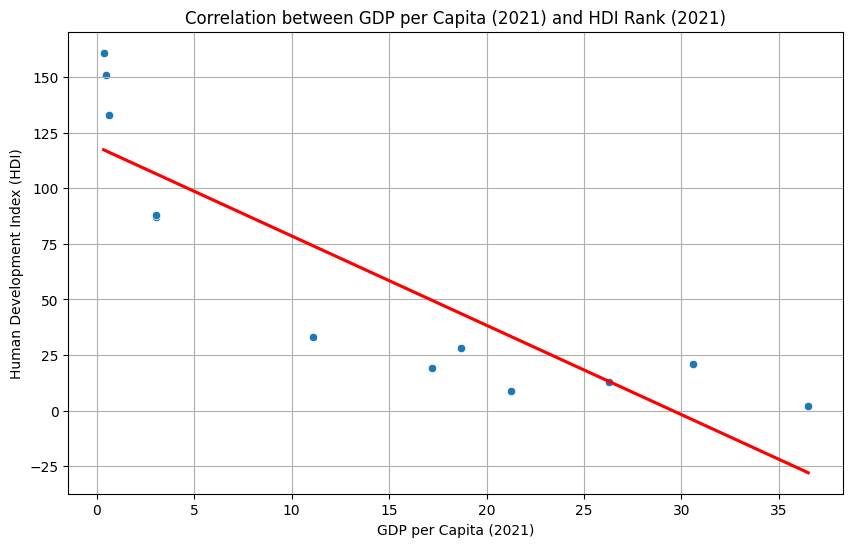

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_capita', y='HDI Rank (2021)', data=merged_gdeco_HDI_unpaiddomwork_df)

# Optionally add a regression line
sns.regplot(x='GDP_per_capita', y='HDI Rank (2021)', data=merged_gdeco_HDI_unpaiddomwork_df, scatter=False, color='red', ci=None)

# Add labels and title
plt.title('Correlation between GDP per Capita (2021) and HDI Rank (2021)')
plt.xlabel('GDP per Capita (2021)')
plt.ylabel('Human Development Index (HDI)')
# Display the plot
plt.grid(True)

plt.show

In [26]:
# to save a plot in a seperate jupyter notebook
# plt.savefig('HDI_GDP_corr_plot.png', format='png', dpi=300)

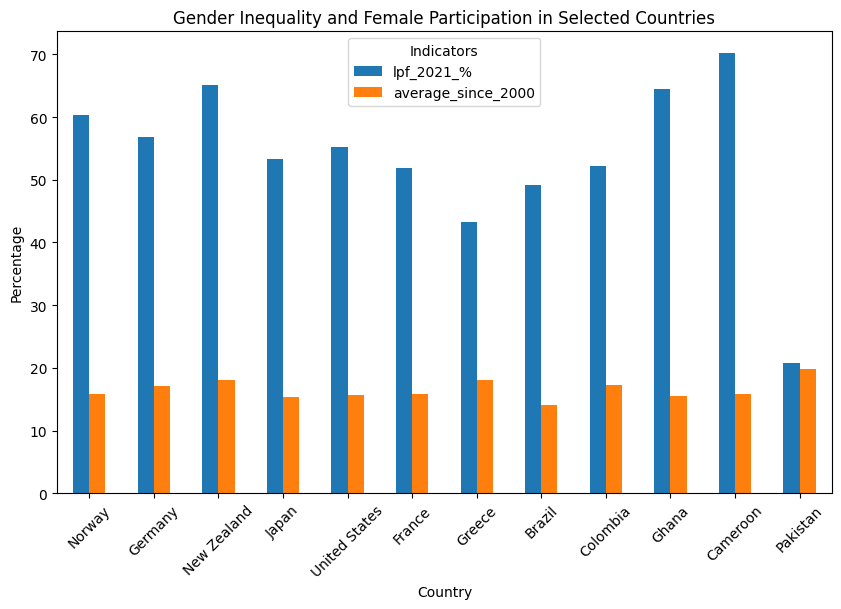

In [28]:
merged_gdeco_HDI_unpaiddomwork_df.plot(x='Country', 
        y=['lpf_2021_%', 'average_since_2000'],
        kind='bar',
        figsize=(10, 6))

plt.title('Gender Inequality and Female Participation in Selected Countries')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Indicators')
plt.show()


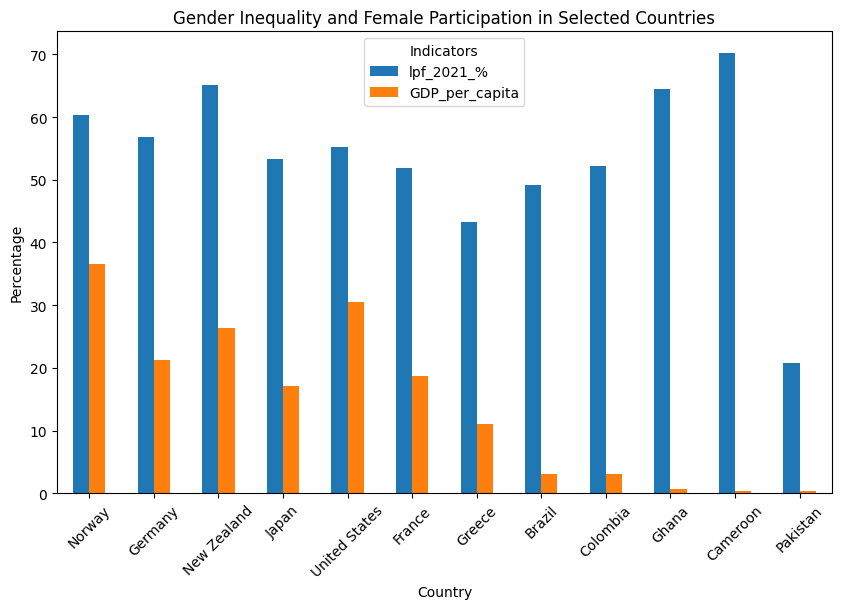

In [30]:
merged_gdeco_HDI_unpaiddomwork_df.plot(x='Country', 
        y=['lpf_2021_%', 'GDP_per_capita'],
        kind='bar',
        figsize=(10, 6))

plt.title('Gender Inequality and Female Participation in Selected Countries')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Indicators')
plt.show()
